Install the necessary packages

Import you data and perform basic data exploration phase

Display general information about the dataset

Create a pandas profiling reports to gain insights into the dataset

Handle Missing and corrupted values

Remove duplicates, if they exist

Handle outliers, if they exist

Encode categorical features

Based on the previous data exploration train and test a machine learning classifier

Create a streamlit application (locally) and add input fields for your features and a validation button at the end of the form

Import your ML model into the streamlit application and start making predictions given the provided features values

Deploy your application on Streamlit share:

Create a github and a streamlit share accounts

Create a new git repo

Upload your local code to the newly created git repo
log in to your streamlit account an deploy your application from the git repo

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
from ydata_profiling import ProfileReport

In [3]:
# load in the dataset
df = pd.read_csv('financial_inclusion_dataset.csv')
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [3]:
# checking the shape of the df
df.shape

(23524, 13)

In [4]:
# Display general dataset information
df.info()

# Display summary statistics
df.describe()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [12]:
# checking for missing values
df.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [14]:
df[df.duplicated()]

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type


In [10]:
profile_report = ProfileReport(df, explorative=True)
profile_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

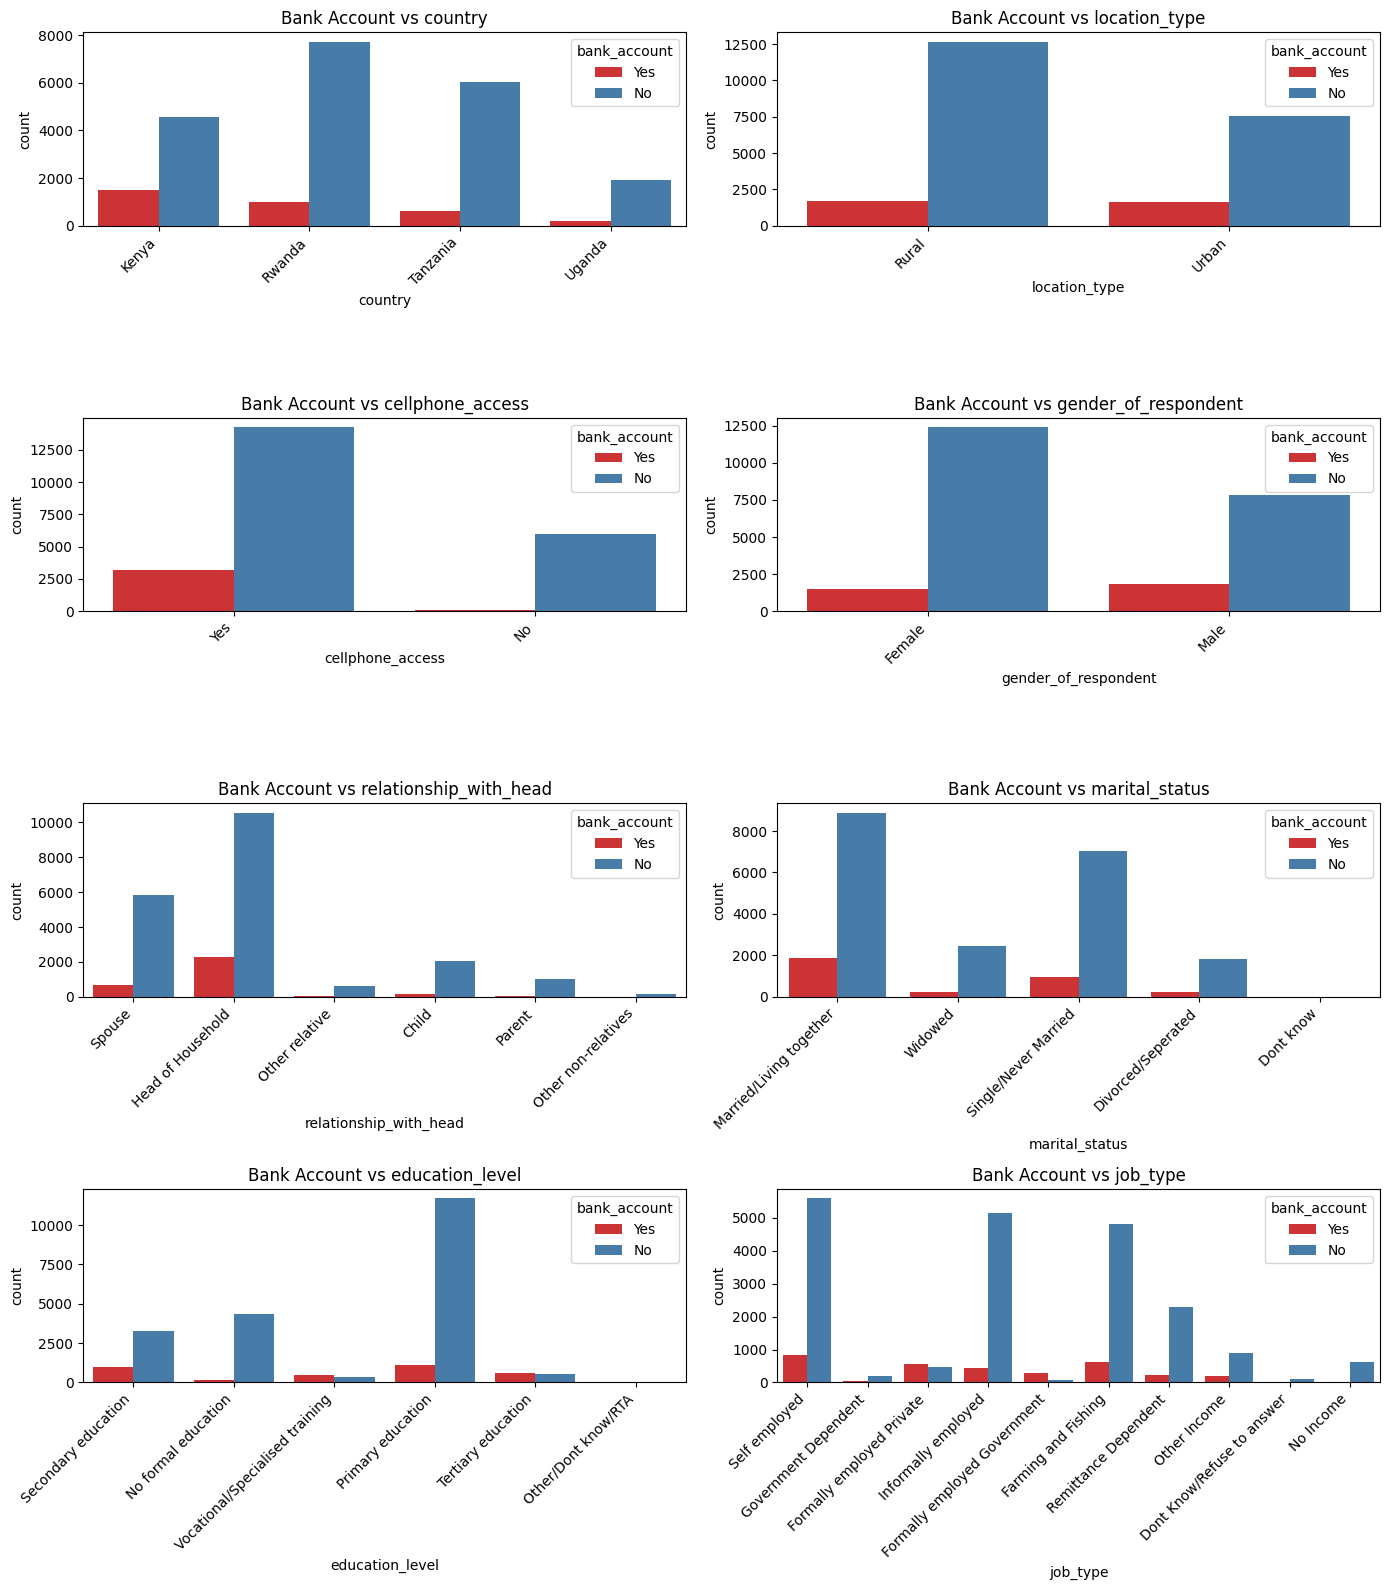

In [15]:
# Set up subplots for categorical variables
categorical_cols = ["country", "location_type", "cellphone_access", 
                    "gender_of_respondent", "relationship_with_head", 
                    "marital_status", "education_level", "job_type"]

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 16))
axes = axes.flatten()

# Plot count plots for each categorical column against bank_account
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, hue="bank_account", data=df, ax=axes[i], palette="Set1")
    axes[i].set_title(f"Bank Account vs {col}")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()


# Data Cleaningnand Training

In [35]:
X = df.drop(columns=["bank_account", 'uniqueid', 'country', 'year'])
y = df["bank_account"]

In [36]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=["object"]).columns

In [37]:
# One-Hot Encode categorical variables
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [38]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Train Logistic Regression model
log_reg = LogisticRegression(C=0.01, max_iter= 200, penalty=None, solver='lbfgs')
log_reg.fit(X_train, y_train)

LogisticRegression(C=0.01, max_iter=200, penalty=None)

In [42]:
log_reg.score(X_test, y_test)

0.8867162592986185

In [46]:
categorical_cols

Index(['location_type', 'cellphone_access', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type'],
      dtype='object')

In [4]:
categorical_cols = df.select_dtypes(include=["object"]).drop(columns=['country', 'uniqueid'])

In [6]:
dummies = pd.get_dummies(categorical_cols, drop_first=True)

In [7]:
num_columns = df.select_dtypes('number').drop('year', axis=1)
num_columns.head()

,household_size,age_of_respondent
0,3,24
1,5,70
2,5,26
3,5,34
4,8,26


In [8]:
pd_concat= pd.concat([dummies, num_columns], axis=1)
pd_concat.head()

,bank_account_Yes,location_type_Urban,cellphone_access_Yes,gender_of_respondent_Male,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,marital_status_Dont know,...,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,household_size,age_of_respondent
0,True,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,3,24
1,False,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,5,70
2,True,True,True,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,5,26
3,False,False,True,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,5,34
4,False,True,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,8,26


In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [12]:
X = pd_concat.drop('bank_account_Yes', axis=1)
y = pd_concat['bank_account_Yes']

In [13]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

for name, model in models.items():
    print(name, ':', np.mean(cross_val_score(model, X, y)))

Logistic Regression : 0.8720455243734051
Decision Tree : 0.8174204602138412
Random Forest : 0.8447545761131232
SVM : 0.8592076203488833


In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV, train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [43]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],  # Regularization type
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'lbfgs', 'saga'],  # Optimization algorithm
    'max_iter': [100, 200, 500]  # Number of iterations
}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)

# Fit the Grid Search on the Training Data
grid.fit(X_train, y_train)

# Print the Best Parameters Found
print("Best Parameters Found:", grid.best_params_)

Best Parameters Found: {'C': 10, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}


In [17]:
log_reg = LogisticRegression(C=0.01, max_iter= 200, penalty=None, solver='lbfgs')
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
log_reg.score(X_test, y_test)

0.8858660998937301

In [24]:
y_test[:5]

16628    False
12261    False
1101      True
20899     True
7521     False
Name: bank_account_Yes, dtype: bool

In [25]:
y_train[:5]

12244    False
5645     False
1724      True
2606     False
21973    False
Name: bank_account_Yes, dtype: bool

In [26]:
import pickle

In [28]:
pickle.dump(log_reg, open('model.pkl', 'wb'))